# This is just a small sample analysis of the Steam data we've collected and processed

### Table of contents

* Importing data

* Checking tables

* Analysis: Are Sci-fi RPGs more popular than Fantasy ones?

    * Task
    * Reorganizing data
    * Making plots
    * Analyzing the results


In [1]:
# Module imports
# standard library imports
import csv
import datetime as dt
import json
import os
import statistics
import time
import re
import ast
import itertools

# third-party imports
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

In [2]:
# Loading data tables
steam = pd.read_csv('../data/export/steam.csv')
missing_ids = pd.read_csv('../data/export/missing_ids.csv')
steam_description_data = pd.read_csv('../data/export/steam_description_data.csv')
steam_media_data = pd.read_csv('../data/export/steam_media_data.csv')
steam_optional = pd.read_csv('../data/export/steam_optional.csv')
steam_packages_info = pd.read_csv('../data/export/steam_packages_info.csv')
steam_requirements_data = pd.read_csv('../data/export/steam_requirements_data.csv')
steam_support_info = pd.read_csv('../data/export/steam_support_info.csv')
steamspy_tag_data = pd.read_csv('../data/export/steamspy_tag_data.csv')

## Let's check our tables:

In [3]:
steam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102504 entries, 0 to 102503
Data columns (total 26 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   appid                102504 non-null  int64  
 1   type                 102504 non-null  object 
 2   name                 102504 non-null  object 
 3   required_age         102504 non-null  int64  
 4   dlc                  9696 non-null    object 
 5   fullgame             34607 non-null   object 
 6   supported_languages  102352 non-null  object 
 7   developers           102463 non-null  object 
 8   publishers           102464 non-null  object 
 9   packages             81153 non-null   object 
 10  platforms            102504 non-null  object 
 11  categories           102398 non-null  object 
 12  genres               102311 non-null  object 
 13  achievements         102504 non-null  float64
 14  release_date         95676 non-null   object 
 15  supported_audio  

In [4]:
steam.sample(10)

appid  type                                               name  \
63811  1289990  game                          Alan's Automaton Workshop   
14808   454410  game                                       GIGA WRECKER   
10481   377950  game                                         Jamestown+   
54100  1135750  game                                    Return to Earth   
54114  1135972   dlc                       The Surge 2 - JCPD Gear Pack   
38161   871230  game                                       Dungeon Rush   
48264  1045180  game             Shattered - Tale of the Forgotten King   
41723   933558   dlc  WARRIORS OROCHI 4/無双OROCHI３ - Legendary Weapon...   
69303  1390850  game                                    Target Practice   
32309   767400  game                                            弹炸人2222   

       required_age        dlc  \
63811             0        NaN   
14808             0   [586900]   
10481             0  [1207660]   
54100             0        NaN   
54114             0        NaN   
38161             0        NaN   
48264             0        NaN   
41723             0        NaN   
69303             0        NaN   
32309             0        NaN   

                                               fullgame  \
63811                                               NaN   
14808                                               NaN   
10481                                               NaN   
54100                                               NaN   
54114        {'appid': '644830', 'name': 'The Surge 2'}   
38161                                               NaN   
48264                                               NaN   
41723  {'appid': '831560', 'name': 'WARRIORS OROCHI 4'}   
69303                                               NaN   
32309                                               NaN   

                                     supported_languages  \
63811  ['English', 'Russian', 'Simplified Chinese', '...   
14808  ['English', 'French', 'German', 'Japanese', 'K...   
10481                                        ['English']   
54100                                        ['English']   
54114  ['English', 'French', 'German', 'Italian', 'Ja...   
38161  ['English', 'French', 'German', 'Italian', 'Ja...   
48264  ['English', 'French', 'German', 'Russian', 'Si...   
41723  ['English', 'Japanese', 'Korean', 'Traditional...   
69303                                        ['English']   
32309                             ['Simplified Chinese']   

                           developers                      publishers  \
63811                 ['Laputa Labs']                 ['Laputa Labs']   
14808             ['GAME FREAK inc.']           ['Rising Star Games']   
10481            ['Final Form Games']         ['Batterystaple Games']   
54100                ['SVAROG GAMES']                ['SVAROG GAMES']   
54114                      ['Deck13']         ['Focus Entertainment']   
38161           ['White Rhino Games']           ['White Rhino Games']   
48264              ['Redlock Studio']              ['Redlock Studio']   
41723  ['KOEI TECMO GAMES CO., LTD.']  ['KOEI TECMO GAMES CO., LTD.']   
69303               ['Tyler F Smith']               ['Tyler F Smith']   
32309                        ['彼岸领域']                        ['彼岸领域']   

               packages  ... coming_soon  price review_score  total_positive  \
63811          [449941]  ...       False  12.49          8.0            94.0   
14808           [98176]  ...       False  19.99          8.0           424.0   
10481           [70213]  ...       False  14.99          8.0           138.0   
54100          [386226]  ...       False   0.79          0.0             2.0   
54114               NaN  ...       False   0.00          7.0            13.0   
38161          [275322]  ...       False   3.29          6.0            10.0   
48264          [348303]  ...       False  24.99          6.0           294.0   
41723          [302700]  ...       False   0.99      

In [5]:
steam[['name','supported_languages']].sample(10)

name  \
49054                                Viking Trickshot   
89799                                  Kaiju Princess   
93253                            Void's Calling ep. 2   
56657  Pixel Puzzles Traditional Jigsaws Pack: Winter   
35268                            The Singularity Wish   
6111                            Loadout: Arm Floaties   
82180                                 Agrou - Fox Pet   
14522                         YEARN Tyrant's Conquest   
49832       SENRAN KAGURA Reflexions - New Outfit Set   
22813                                  Alien Insanity   

                                     supported_languages  
49054                                        ['English']  
89799  ['English', 'Japanese', 'Russian', 'Simplified...  
93253                             ['English', 'Russian']  
56657                                        ['English']  
35268                                        ['English']  
6111   ['English', 'French', 'German', 'Italian', 'Po...  
82180  ['English', 'French', 'Korean', 'Turkish', 'Vi...  
14522  ['Dutch', 'English', 'French', 'German', 'Ital...  
49832  ['English', 'French', 'Japanese', 'Korean', 'S...  
22813                                        ['English']

In [6]:
def f(x):
    if pd.isna(x):
        return []
    try:
        return ast.literal_eval(str(x))   
    except Exception as e:
        print(e)
        return []
    
temp_df = steam[['name','supported_languages']].copy()
#temp_df['supported_languages'] = temp_df['supported_languages'].fillna("[]")
#temp_df['supported_languages'] = temp_df['supported_languages'].apply(lambda x:f(x))
temp_df['supported_languages'] = temp_df[temp_df['supported_languages'].notnull()]['supported_languages'].apply(eval)
temp_df.explode('supported_languages')

name  supported_languages
0                             Counter-Strike              English
0                             Counter-Strike               French
0                             Counter-Strike               German
0                             Counter-Strike              Italian
0                             Counter-Strike               Korean
...                                      ...                  ...
102503  Bioshock Infinite: Columbia's Finest             Japanese
102503  Bioshock Infinite: Columbia's Finest               Polish
102503  Bioshock Infinite: Columbia's Finest  Portuguese - Brazil
102503  Bioshock Infinite: Columbia's Finest              Russian
102503  Bioshock Infinite: Columbia's Finest      Spanish - Spain

[412053 rows x 2 columns]

In [7]:
missing_ids.sample(10)

appid                reason
464  102897      Missing app name
576  103012      Missing app name
68   102490      Missing app name
300  102732      Missing app name
222  102654      Missing app name
411  102843      Missing app name
95   102517      Missing app name
322  102754      Missing app name
273  102705      Missing app name
18    34330  Storefront appid fix

In [8]:
steam_description_data.sample(10)

appid                               detailed_description  \
25458    649660  LIBERTY VR is an action adventure game, taking...   
84619   1667827  About：<br />\r\n&quot;Tiger Tank 59&quot; is a...   
74350   1481940  In the game Medium, players act as psychic med...   
71953   1440290  <strong>”Psycho”</strong> is a 3D horror game ...   
65519   1330070  ■“Escape from Hell” minigame<br />\r\nMarianne...   
41972    939670  Empire of Devil is a sandbox style real-time s...   
100586  1950270  Dungeonrite is a First Person Dungeon Crawler ...   
29255    717200  <img src="https://cdn.akamai.steamstatic.com/s...   
32742    777310  <h2 class="bb_tag">Introduction:</h2><br>Low p...   
86007   1686530  <img src="https://cdn.akamai.steamstatic.com/s...   

                                           about_the_game  \
25458   LIBERTY VR is an action adventure game, taking...   
84619   About：<br />\r\n&quot;Tiger Tank 59&quot; is a...   
74350   In the game Medium, players act as psychic med...   
71953   <strong>”Psycho”</strong> is a 3D horror game ...   
65519   ■“Escape from Hell” minigame<br />\r\nMarianne...   
41972   Empire of Devil is a sandbox style real-time s...   
100586  Dungeonrite is a First Person Dungeon Crawler ...   
29255   <img src="https://cdn.akamai.steamstatic.com/s...   
32742   <h2 class="bb_tag">Introduction:</h2><br>Low p...   
86007   <img src="https://cdn.akamai.steamstatic.com/s...   

                                        short_description  
25458   LIBERTY VR is an action adventure game, taking...  
84619   About： &quot;Tiger Tank 59&quot; is a top-down...  
74350   In the game Medium, players act as psychic med...  
71953   ”Psycho” is a 3D horror game that allows you t...  
65519   This is an “UnHolY ToRturEr” update patch file...  
41972   The civil war rages across the kingdom and the...  
100586  Dungeonrite is a First Person Dungeon Crawler ...  
29255   &quot;KEEPER is an arcade game about killing h...  
32742   Low Poly FPS Shooter where you need find 5 key...  
86007   Firewall, vaccine, cleaner... Place various bl...

In [9]:
steam_media_data.sample(10)

appid                                       header_image  \
83936  1653460  https://cdn.akamai.steamstatic.com/steam/apps/...   
26357   666030  https://cdn.akamai.steamstatic.com/steam/apps/...   
68119  1373390  https://cdn.akamai.steamstatic.com/steam/apps/...   
15581   468240  https://cdn.akamai.steamstatic.com/steam/apps/...   
73705  1470900  https://cdn.akamai.steamstatic.com/steam/apps/...   
17191   503690  https://cdn.akamai.steamstatic.com/steam/apps/...   
31292   753776  https://cdn.akamai.steamstatic.com/steam/apps/...   
21743   581650  https://cdn.akamai.steamstatic.com/steam/apps/...   
45367   998802  https://cdn.akamai.steamstatic.com/steam/apps/...   
19453   543310  https://cdn.akamai.steamstatic.com/steam/apps/...   

                                             screenshots  \
83936  [{'id': 0, 'path_thumbnail': 'https://cdn.akam...   
26357  [{'id': 0, 'path_thumbnail': 'https://cdn.akam...   
68119  [{'id': 0, 'path_thumbnail': 'https://cdn.akam...   
15581  [{'id': 0, 'path_thumbnail': 'https://cdn.akam...   
73705  [{'id': 0, 'path_thumbnail': 'https://cdn.akam...   
17191  [{'id': 0, 'path_thumbnail': 'https://cdn.akam...   
31292  [{'id': 0, 'path_thumbnail': 'https://cdn.akam...   
21743  [{'id': 0, 'path_thumbnail': 'https://cdn.akam...   
45367  [{'id': 0, 'path_thumbnail': 'https://cdn.akam...   
19453  [{'id': 0, 'path_thumbnail': 'https://cdn.akam...   

                                              background  \
83936  https://cdn.akamai.steamstatic.com/steam/apps/...   
26357  https://cdn.akamai.steamstatic.com/steam/apps/...   
68119  https://cdn.akamai.steamstatic.com/steam/apps/...   
15581  https://cdn.akamai.steamstatic.com/steam/apps/...   
73705  https://cdn.akamai.steamstatic.com/steam/apps/...   
17191  https://cdn.akamai.steamstatic.com/steam/apps/...   
31292  https://cdn.akamai.steamstatic.com/steam/apps/...   
21743  https://cdn.akamai.steamstatic.com/steam/apps/...   
45367  https://cdn.akamai.steamstatic.com/steam/apps/...   
19453  https://cdn.akamai.steamstatic.com/steam/apps/...   

                                                  movies  
83936  [{'id': 256866840, 'name': 'Revived Souls Trai...  
26357                                                NaN  
68119  [{'id': 256863658, 'name': 'Steam Page Launch ...  
15581  [{'id': 256706820, 'name': 'VR Regatta 1.0', '...  
73705  [{'id': 256808949, 'name': 'Roscosmas Landing ...  
17191  [{'id': 256677957, 'name': 'Starship Disco', '...  
31292                                                NaN  
21743  [{'id': 256677905, 'name': 'Original', 'thumbn...  
45367                                                NaN  
19453                                                NaN

In [10]:
steam_optional.sample(10)

appid drm_notice ext_user_account_notice      demos  \
7635   1006120        NaN                     NaN        NaN   
16490  1529290        NaN                     NaN        NaN   
422      24200        NaN               Daybreak         NaN   
21314  1852410        NaN                     NaN        NaN   
2166    332200        NaN                     NaN        NaN   
16214  1509730        NaN                     NaN  [1509860]   
11100  1198590        NaN                     NaN  [1795520]   
18393  1650910        NaN                     NaN        NaN   
14802  1416460        NaN                     NaN        NaN   
892     201230        NaN                     NaN        NaN   

                                     content_descriptors  metacritic_score  \
7635   The game features a nude Sumo in a humorous co...               NaN   
16490  Prison Wars contains content not appropriate f...               NaN   
422                                                  NaN              72.0   
21314  This game has certain adult features such as u...               NaN   
2166                                                 NaN              80.0   
16214                                                NaN               NaN   
11100                                                NaN               NaN   
18393  This product has content typically considered ...               NaN   
14802                        Blood, guts... and candies!               NaN   
892                                                  NaN              83.0   

                                          metacritic_url  
7635                                                 NaN  
16490                                                NaN  
422    https://www.metacritic.com/game/pc/dc-universe...  
21314                                                NaN  
2166   https://www.metacritic.com/game/pc/axiom-verge...  
16214                                                NaN  
11100                                                NaN  
18393                                                NaN  
14802                                                NaN  
892    https://www.metacritic.com/game/pc/everquest-i...

In [11]:
steam_packages_info.sample(10)

appid     type                                              title  \
62858  1482510  default                              Buy Tap-Tap Adventure   
61972  1460970  default                                Buy Fish and Groove   
80969  1969740  default                                         Buy Aqorel   
69648  1655060  default                                      Buy Switch It   
64768  1530580  default                                 Buy Lame Defenders   
18562   552653  default                     Buy Army Gals - Dakimakuras #1   
69435  1648411  default   Buy RPG Maker MZ - DorapixelMapChips - Modern JP   
22833   636780  default  Buy Fantasy Grounds - B02: Happiness in Slaver...   
56574  1337530  default                                      Buy Maskmaker   
15799   500180  default                                     Buy Epic Flail   

       is_recurring_subscription  \
62858                      False   
61972                      False   
80969                      False   
69648                      False   
64768                      False   
18562                      False   
69435                      False   
22833                      False   
56574                      False   
15799                      False   

                                                    subs  
62858  [{'packageid': 522271, 'percent_savings_text':...  
61972  [{'packageid': 514425, 'percent_savings_text':...  
80969  [{'packageid': 711325, 'percent_savings_text':...  
69648  [{'packageid': 588190, 'percent_savings_text':...  
64768  [{'packageid': 540052, 'percent_savings_text':...  
18562  [{'packageid': 137269, 'percent_savings_text':...  
69435  [{'packageid': 585731, 'percent_savings_text':...  
22833  [{'packageid': 175040, 'percent_savings_text':...  
56574  [{'packageid': 467564, 'percent_savings_text':...  
15799  [{'packageid': 114591, 'percent_savings_text':...

In [12]:
steam_requirements_data.sample(10)

appid                                    pc_requirements  \
23056  1164750  {'minimum': '<strong>Minimum:</strong><br><ul ...   
4618    408940  {'minimum': '<strong>Minimum:</strong><br><ul ...   
32642  1537990  {'minimum': '<strong>Minimum:</strong><br><ul ...   
3982    383270  {'minimum': '<strong>Minimum:</strong><br><ul ...   
24130  1199750  {'minimum': '<strong>Minimum:</strong><br><ul ...   
18735   992860  {'minimum': '<strong>Minimum:</strong><br><ul ...   
19073  1005450  {'minimum': '<strong>Minimum:</strong><br><ul ...   
22721  1153440  {'minimum': '<strong>Minimum:</strong><br><ul ...   
26730  1296790  {'minimum': '<strong>Minimum:</strong><br><ul ...   
11636   710630  {'minimum': '<strong>Minimum:</strong><br><ul ...   

                                        mac_requirements  \
23056  {'minimum': '<strong>Minimum:</strong><br><ul ...   
4618   {'minimum': '<strong>Minimum:</strong><br><ul ...   
32642  {'minimum': '<strong>Minimum:</strong><br><ul ...   
3982   {'minimum': '<strong>Minimum:</strong><br><ul ...   
24130  {'minimum': '<strong>Minimum:</strong><br><ul ...   
18735  {'minimum': '<strong>Minimum:</strong><br><ul ...   
19073  {'minimum': '<strong>Minimum:</strong><br><ul ...   
22721  {'minimum': '<strong>Minimum:</strong><br><ul ...   
26730  {'minimum': '<strong>Minimum:</strong><br><ul ...   
11636  {'minimum': '<strong>Minimum:</strong><br><ul ...   

                                      linux_requirements  \
23056  {'minimum': '<strong>Minimum:</strong><br><ul ...   
4618   {'minimum': '<strong>Minimum:</strong><br><ul ...   
32642  {'minimum': '<strong>Minimum:</strong><br><ul ...   
3982   {'minimum': '<strong>Minimum:</strong><br><ul ...   
24130                                                 []   
18735  {'minimum': '<strong>Minimum:</strong><br><ul ...   
19073  {'minimum': '<strong>Minimum:</strong><br><ul ...   
22721  {'minimum': '<strong>Minimum:</strong><br><ul ...   
26730                                                 []   
11636                                                 []   

                                              pc_minimum  \
23056  Requires a 64-bit processor and operating syst...   
4618                                             OS: Any   
32642  Requires a 64-bit processor and operating syst...   
3982   OS: Windows XP SP3/Vista with SP2/7/8/8.1/10 x...   
24130  OS: Windows 7x , 8x or 10x Processor: 1.6 GHz ...   
18735  Requires a 64-bit processor and operating syst...   
19073  Requires a 64-bit processor and operating syst...   
22721   Additional Notes: System supporting RPG Maker MV   
26730  OS: Windows 7 Processor: Intel Core 2 Duo E440...   
11636  OS: Windows 7 / 8 / 10 Processor: 2.4 GHz Dual...   

                                          pc_recommended  \
23056  Requires a 64-bit processor and operating syst...   
4618                                                 NaN   
32642  Requires a 64-bit processor and operating syst...   
3982   OS: Windows XP SP3/Vista with SP2/7/8/8.1/10 x...   
24130  OS: Windows 7x , 8x or 10x Processor: 2.0 GHz ...   
18735  Requires a 64-bit processor and operating syst...   
19073   Requires a 64-bit processor and operating system   
22721                                                NaN   
26730  OS: Windows 10 Processor: Intel Core i5 Memory...   
11636                                                NaN   

                                             mac_minimum  \
23056   Requires a 64-bit processor and operating system   
4618                                          OS: Decent   
32642   Requires a 64-bit processor and operating system   
3982   OS: OS X 10.9 and above Processor: Intel Core2...   
24130  OS: 10.6.8 or newer Processor: 1.6 GHz or high...   
18735  Requires a 64-bit processor and operating syst...   
19073   Requires a 64-bit processor and operating system   
22721   Additional Notes: System supporting RPG Maker MV   
26730  OS: Snow Leopard 10.6 Processor: Intel Core i3...   
11636

In [13]:
steam_support_info.sample(10)

appid                                     website  \
65432   1335270                                         NaN   
46794   1028540                                         NaN   
88410   1718920                 https://www.airconsole.com/   
89794   1744839  https://blue-reflection.com/secondlight/us   
99567   1936700                                         NaN   
10391    381590              http://www.asbointeractive.com   
98276   1907060                                         NaN   
5712     301320              http://www.nolimitscoaster.com   
88430   1719230                                         NaN   
100422  1958020                                         NaN   

                                          support_url  \
65432   http://flowstudios.tech/cursedletters/support   
46794                                             NaN   
88410                 https://www.airconsole.com/help   
89794        http://www.koeitecmoamerica.com/support/   
99567                                             NaN   
10391                                             NaN   
98276                                             NaN   
5712                   http://www.nolimitscoaster.com   
88430                                             NaN   
100422                  https://twitter.com/newbuildc   

                        support_email  
65432         support@flowstudios.com  
46794             support@taikovr.com  
88410               hello@n-dream.com  
89794                             NaN  
99567       josephvongracek@gmail.com  
10391       asbointeractive@gmail.com  
98276         okjoystudio@outlook.com  
5712     nolimits@nolimitscoaster.com  
88430   blinkerfluidstudios@gmail.com  
100422         newbuildcorp@gmail.com

In [14]:
steamspy_tag_data.sample(10)

appid  1980s  1990s  2.5d  2d  2d_fighter  2d_platformer  360_video  \
20415    558320      0      0     0   0           0              0          0   
54390   1141170      0      0     0   0           0              0          0   
93902   1806157      0      0     0   0           0              0          0   
41531    931480      0      0     0   0           0              0          0   
53858   1132450      0      0     0   0           0              0          0   
101694  1976450     26     24     0   0           0              0          0   
98835   1906240      0      0     0   0           0              0          0   
38979    886250      0      0     0   0           0              0          0   
64232   1297810      0      0     0   0           0              0          0   
34808    812140      0      0     0   0           0              0          0   

        3d  3d_fighter  ...  web_publishing  well_written  werewolves  \
20415   10           0  ...               0             0           0   
54390    0           0  ...               0             0           0   
93902    0           0  ...               0             0           0   
41531    0           0  ...               0             0           0   
53858    0           0  ...               0             0           0   
101694  30           0  ...               0             0           0   
98835    0           0  ...               0             0           0   
38979    0           0  ...               0             0           0   
64232    0           0  ...               0             0           0   
34808    0           0  ...               0             0           0   

        western  word_game  world_war_i  world_war_ii  wrestling  zombies  \
20415         0          0            0             0          0        0   
54390         0          0            0             0          0        0   
93902         0          0            0             0          0        0   
41531         0          0            0             0          0        0   
53858         0          0            0             0          0        0   
101694        0          0            0             0          0        0   
98835         0          0            0             0          0        0   
38979         0          0            0             0          0        0   
64232         0          0            0             0          0        0   
34808         0          0            0             0          0        0   

        e_sports  
20415          0  
54390          0  
93902          0  
41531          0  
53858          0  
101694         0  
98835          0  
38979          0  
64232          0  
34808          0  

[10 rows x 432 columns]

# Analysis: Are Sci-fi RPGs more popular than Fantasy ones?

## Task

* Determine how popular are Sci-Fi RPGs comparing to the Fantasy ones
    * Number of owners and number of games
    * Total number of tags and tags present
    * Real-time vs Turn-based
    * Changes over time
    

*Keep in mind, SteamSpy owners data is an estimate and might be quite different from the real game owner counts*

## Reorganizing data

### We'll need this data:

#### From steam:
* appid
* name
* type: game
* genres: RPG
* release_date
* coming_soon: False
* rating
* total_positive+total_negative
* owners: get average
* tags: filter by "Fantasy" "Sci-fi" "Cyberpunk"

#### From steamspy_tag_data:
* appid
* tags

In [15]:
# setting indexes
steam = steam.set_index("appid")
steamspy_tag_data = steamspy_tag_data.set_index("appid")

In [16]:
# filtering out the unneeded data part 1
analysis_df = steam[(steam["type"] == "game") 
                    & (steam["coming_soon"] == False)][["name",
                                                        "genres",
                                                        "release_date",
                                                        "rating","total_positive",
                                                        "total_negative",
                                                        "owners",
                                                        "tags"]].copy()
# unwrapping strings -> list
analysis_df['genres'] = analysis_df[analysis_df['genres'].notnull()]['genres'].apply(eval)
analysis_df['tags'] = analysis_df[analysis_df['tags'].notnull()]['tags'].apply(eval)
# setting some columns format
# total reviews
analysis_df['total_reviews'] = analysis_df['total_positive'] + analysis_df['total_negative']
# converting release_date
analysis_df['release_date'] = analysis_df['release_date'].apply(lambda x: pd.to_datetime(x, infer_datetime_format=True).year)
def parse_owners(owners_str):
    owners_split = owners_str.split('-')
    result = (int(owners_split[0]) + int(owners_split[1])) // 2
    return result
# average owners
analysis_df["owners"] = analysis_df["owners"].apply(lambda x: 0 if x != x else parse_owners(x))

In [17]:
# genres values
analysis_df.genres.explode().value_counts(dropna=False)

Indie                    40367
Action                   23721
Casual                   23233
Adventure                21633
Simulation               10999
Strategy                 10748
RPG                       9632
Early Access              5994
Free to Play              4313
Sports                    2604
Racing                    2056
Massively Multiplayer     1444
Violent                    490
Gore                       290
Nudity                     113
Sexual Content             103
NaN                         95
Education                   20
Utilities                   11
Design & Illustration        8
Game Development             7
Software Training            6
Audio Production             5
Animation & Modeling         5
Web Publishing               4
Accounting                   3
Video Production             3
Movie                        2
Photo Editing                1
Documentary                  1
Episodic                     1
Short                        1
Tutorial

In [18]:
# filtering out genres
analysis_df.dropna(subset=['genres'], how='all', inplace = True)
genres_mask = analysis_df.genres.apply(lambda x: 'RPG' in x)

analysis_df = analysis_df[genres_mask]

In [19]:
# tags values
temp_df = analysis_df.dropna(subset=['tags'], how='all')
temp_df = temp_df.explode('tags')
temp_df['tags'].unique()

array(['RPG', 'First-Person', 'Classic', 'Atmospheric', 'Dark Fantasy',
       'Fantasy', 'Singleplayer', 'Immersive Sim', 'Underground',
       'Adventure', 'Action', 'Story Rich', 'Exploration', 'Magic',
       'Dungeon Crawler', 'Horror', 'Action RPG', 'Stealth', 'Open World',
       'Inventory Management', 'Third Person', 'Multiplayer', 'Medieval',
       'Character Customization', 'Hack and Slash', 'Co-op', 'Swordplay',
       'Multiple Endings', 'Gore', 'Indie', 'Mystery', 'Assassin',
       'Funny', 'Survival', 'Simulation', 'FPS', 'Comedy', 'Shooter',
       'Strategy', 'Difficult', 'Stylized', 'Replay Value', 'Puzzle',
       'Turn-Based Strategy', 'Female Protagonist', 'Turn-Based',
       'Hex Grid', 'Tactical', 'Turn-Based Combat', 'Tactical RPG',
       'Great Soundtrack', 'Pirates', 'Naval', 'Sandbox', 'Sailing',
       'Historical', 'Economy', 'Remake', 'Trading', 'Naval Combat',
       'Choose Your Own Adventure', 'Fighting', 'Loot',
       'Post-apocalyptic', 'Survival

In [20]:
# processing tags - removing tagless->exploding->filtering out rows we don't need
# removing rows without tags
analysis_df.dropna(subset=['tags'], how='all', inplace = True)
# exploding
analysis_df = analysis_df.explode('tags')

In [21]:
# filtering out all the tags we don't need
tags_list =["Anime", "Cyberpunk", "Dark Fantasy", "Fantasy", "Horror", "Medieval", "Space", "Sci-fi"]
analysis_df = analysis_df[analysis_df['tags'].isin(tags_list)]

In [22]:
analysis_df

name  \
appid                              
1700                 Arx Fatalis   
1700                 Arx Fatalis   
1700                 Arx Fatalis   
1930     Two Worlds Epic Edition   
1930     Two Worlds Epic Edition   
...                          ...   
1958230                    LOONY   
1960790       Battle of Heroes 3   
1960790       Battle of Heroes 3   
1965360               Wet Dreams   
1971980       Grey Eyes of Death   

                                                    genres  release_date  \
appid                                                                      
1700                                                 [RPG]        2007.0   
1700                                                 [RPG]        2007.0   
1700                                                 [RPG]        2007.0   
1930                                                 [RPG]        2009.0   
1930                                                 [RPG]        2009.0   
...                                                    ...           ...   
1958230       [Casual, Indie, RPG, Strategy, Early Access]        2022.0   
1960790  [Adventure, Free to Play, Indie, Massively Mul...        2022.0   
1960790  [Adventure, Free to Play, Indie, Massively Mul...        2022.0   
1965360                    [Adventure, Casual, Indie, RPG]        2022.0   
1971980                            [Adventure, Indie, RPG]        2022.0   

            rating  total_positive  total_negative   owners          tags  \
appid                                                                       
1700     83.058079          1208.0           176.0   350000  Dark Fantasy   
1700     83.058079          1208.0           176.0   350000       Fantasy   
1700     83.058079          1208.0           176.0   350000        Horror   
1930     73.400235          1605.0           507.0  1500000       Fantasy   
1930     73.400235          1605.0           507.0  1500000      Medieval   
...            ...             ...             ...      ...           ...   
1958230  55.686457             2.0             1.0    10000        Horror   
1960790  44.313543             1.0             2.0    10000      Medieval   
1960790  44.313543             1.0             2.0    10000       Fantasy   
1965360  59.416365             1.0             0.0    10000         Anime   
1971980  43.951406             3.0             5.0    10000        Horror   

         total_reviews  
appid                   
1700            1384.0  
1700            1384.0  
1700            1384.0  
1930            2112.0  
1930            2112.0  
...                ...  
1958230            3.0  
1960790            3.0  
1960790            3.0  
1965360            1.0  
1971980            8.0  

[6979 rows x 9 columns]

It looks like we don't have many games left. 

On the first look, it seems like that's because a lot of our games don't have the user tags. But let's see how many of these games are important by filtering out non-released games, games without the price or reviews:

In [23]:
steam[(steam["tags"].isnull()) 
      & (steam["type"] == "game") 
      & (steam["coming_soon"] == False) 
      & (steam["price"].notnull()) 
      & (steam["total_positive"]+steam["total_negative"] > 0)]

type                                 name  required_age        dlc  \
appid                                                                         
35030    game            Championship Manager 2010             0        NaN   
37360    game                    Mahjong Roadshow™             0        NaN   
258700   game                   Dragon Nest Europe             0        NaN   
261430   game                             AION MMO             0        NaN   
288080   game  BoneTown: The Second Coming Edition             0  [1668100]   
...       ...                                  ...           ...        ...   
1953970  game                     MATH EXPRESSions             0  [1976070]   
1957060  game                            NTR Dream             0        NaN   
1962440  game             Memory Puzzle - Bad Girl             0        NaN   
1962840  game           Hentai Girls - Neko Pastry             0        NaN   
1970710  game           Sex Diary - Swingers Yacht             0        NaN   

        fullgame                                supported_languages  \
appid                                                                 
35030        NaN  ['English', 'French', 'Italian', 'Polish', 'Sp...   
37360        NaN                                        ['English']   
258700       NaN                    ['English', 'French', 'German']   
261430       NaN                    ['English', 'French', 'German']   
288080       NaN                                        ['English']   
...          ...                                                ...   
1953970      NaN                                        ['English']   
1957060      NaN                                        ['English']   
1962440      NaN                                        ['English']   
1962840      NaN                                        ['English']   
1970710      NaN                                        ['English']   

                         developers             publishers  packages  \
appid                                                                  
35030    ['Beautiful Game Studios']        ['Square Enix']    [2202]   
37360                 ['PlayFirst']          ['PlayFirst']    [4041]   
258700         ['Eyedentity Games']     ['Cherry Credits']       NaN   
261430                   ['NCSOFT']  ['Gameforge 4D GmbH']       NaN   
288080           ['D-Dub Software']     ['D-Dub Software']   [40146]   
...                             ...                    ...       ...   
1953970                ['Mandinga']           ['Mandinga']       NaN   
1957060             ['Byaka Games']        ['Byaka Games']  [705938]   
1962440         ['EroticGamesClub']    ['EroticGamesClub']  [708540]   
1962840         ['EroticGamesClub']    ['EroticGamesClub']  [708801]   
1970710         ['EroticGamesClub']    ['EroticGamesClub']  [711691]   

                           platforms  ... coming_soon  price  review_score  \
appid                                 ...                                    
35030                    ['windows']  ...       False   6.99           6.0   
37360             ['windows', 'mac']  ...       False   5.99           0.0   
258700                   ['windows']  ...       False   0.00           5.0   
261430                   ['windows']  ...       False   0.00           5.0   
288080                   ['windows']  ...       False  16.79           8.0   
...                              ...  ...         ...    ...           ...   
1953970                  ['windows']  ...       False   0.00           0.0   
1957060  ['windows', 'mac', 'linux']  ...       False   8.19           0.0   
1962440                  ['windows']  ...       False   1.59           0.0   
1962840                  ['windows']  ...       False   1.59           0.0   
1970710                  ['windows']  ...       False   2.39           0.0   

        total_positive total_negative     rating   owners  average_forever  \
appid                      

Total positive reviews for these games:

In [24]:
temp_df = steam[(steam["tags"].isnull()) 
              & (steam["type"] == "game") 
              & (steam["coming_soon"] == False) 
              & (steam["price"].notnull()) 
              & (steam["total_positive"]+steam["total_negative"] > 0)]
print("Total reviews for selection:",temp_df["total_positive"].sum()+temp_df["total_negative"].sum())
print("Total games for selection:",temp_df["name"].count())

Total reviews for selection: 225227.0
Total games for selection: 1853


Doesn't seem like we have a lot of them but it might be a good idea to find a different way of working with these games in the future

In [25]:
analysis_df.groupby('tags').agg(total_owners=pd.NamedAgg(column='owners', aggfunc='sum'),
                                average_owners=pd.NamedAgg(column='owners', aggfunc='mean'),
                                median_owners=pd.NamedAgg(column='owners', aggfunc='median'),
                                total_games=pd.NamedAgg(column='name', aggfunc='count'),
                                total_reviews=pd.NamedAgg(column='total_reviews', aggfunc='sum'),
                                median_ratings=pd.NamedAgg(column='rating', aggfunc='median'))

total_owners  average_owners  median_owners  total_games  \
tags                                                                     
Anime            177115000   109600.866337        10000.0         1616   
Cyberpunk         50520000   273081.081081        35000.0          185   
Dark Fantasy     177480000   322690.909091        10000.0          550   
Fantasy          691020000   288767.237777        10000.0         2393   
Horror           157705000   252732.371795        35000.0          624   
Medieval         135580000   220097.402597        10000.0          616   
Sci-fi           267720000   386320.346320        35000.0          693   
Space             96510000   319569.536424        35000.0          302   

              total_reviews  median_ratings  
tags                                         
Anime             1745118.0       69.204267  
Cyberpunk          678781.0       68.944047  
Dark Fantasy      2305649.0       69.199408  
Fantasy           4799441.0       67.931725  
Horror            1338253.0       67.059371  
Medieval          1848150.0       65.871203  
Sci-fi            2650370.0       68.113726  
Space              481216.0       64.053445

## Making plots


### Boxplots

#### Owners

In [26]:
# getting tags
tags = analysis_df["tags"].unique().tolist()

In [27]:
analysis_df.owners.value_counts()

10000       3399
35000       1221
75000        705
150000       554
350000       517
750000       302
1500000      149
3500000      100
7500000       16
15000000       8
35000000       7
75000000       1
Name: owners, dtype: int64

In [28]:
temp_df = analysis_df[analysis_df["tags"] == "Fantasy"]
temp_df.sort_values(by = "owners", ascending = False)

name  \
appid                                
1063730                  New World   
1245620                 ELDEN RING   
1468810      鬼谷八荒 Tale of Immortal   
238960               Path of Exile   
292030   The Witcher® 3: Wild Hunt   
...                            ...   
1164480                 Killer Gin   
1162920           Time of the Moon   
1162010   奇幻与砍杀2 Fantasy & Blade Ⅱ   
1153550         Dark Fairy Fantasy   
1960790         Battle of Heroes 3   

                                                    genres  release_date  \
appid                                                                      
1063730    [Action, Adventure, Massively Multiplayer, RPG]        2021.0   
1245620                                      [Action, RPG]        2022.0   
1468810  [Action, Adventure, Indie, RPG, Simulation, Ea...        2021.0   
238960   [Action, Adventure, Free to Play, Indie, Massi...        2013.0   
292030                                               [RPG]        2015.0   
...                                                    ...           ...   
1164480                                              [RPG]        2020.0   
1162920                            [Adventure, Indie, RPG]        2019.0   
1162010  [Action, Adventure, Casual, Indie, RPG, Strategy]        2019.0   
1153550                                       [Indie, RPG]        2019.0   
1960790  [Adventure, Free to Play, Indie, Massively Mul...        2022.0   

            rating  total_positive  total_negative    owners     tags  \
appid                                                                   
1063730  67.272283        131767.0         62793.0  75000000  Fantasy   
1245620  89.204677        332613.0         36755.0  35000000  Fantasy   
1468810  52.964776         91090.0         80630.0  35000000  Fantasy   
238960   87.303061           998.0            81.0  35000000  Fantasy   
292030   96.589175        542175.0         14049.0  15000000  Fantasy   
...            ...             ...             ...       ...      ...   
1164480  68.145781             7.0             1.0     10000  Fantasy   
1162920  70.844323             5.0             0.0     10000  Fantasy   
1162010  68.910053            81.0            27.0     10000  Fantasy   
1153550  32.940629             0.0             3.0     10000  Fantasy   
1960790  44.313543             1.0             2.0     10000  Fantasy   

         total_reviews  
appid                   
1063730       194560.0  
1245620       369368.0  
1468810       171720.0  
238960          1079.0  
292030        556224.0  
...                ...  
1164480            8.0  
1162920            5.0  
1162010          108.0  
1153550            3.0  
1960790            3.0  

[2393 rows x 9 columns]

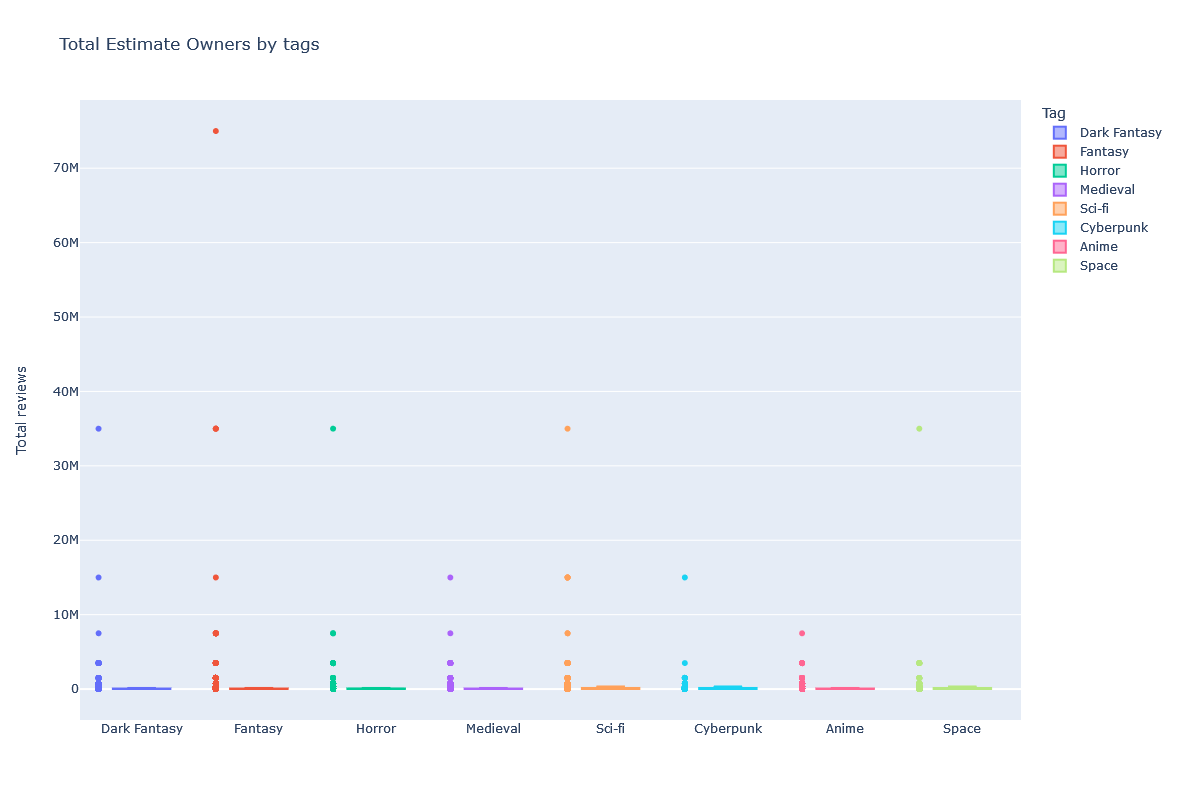

In [29]:
fig = go.Figure()

for tag in tags:
    fig.add_trace(go.Box(
        y=analysis_df[analysis_df["tags"]==tag]["owners"],
        name=tag,
        text = analysis_df[analysis_df["tags"]==tag]["name"],
        hovertemplate='<br>Game: %{text}<br>Owners: %{y}',
    ))
    
fig.update_traces(boxpoints='all',
                  jitter=0)

fig.update_layout(
    title="Total Estimate Owners by tags",
    yaxis_title="Total reviews",
    legend_title="Tag",
    height=800
    )
    
fig.show()

#### Reviews

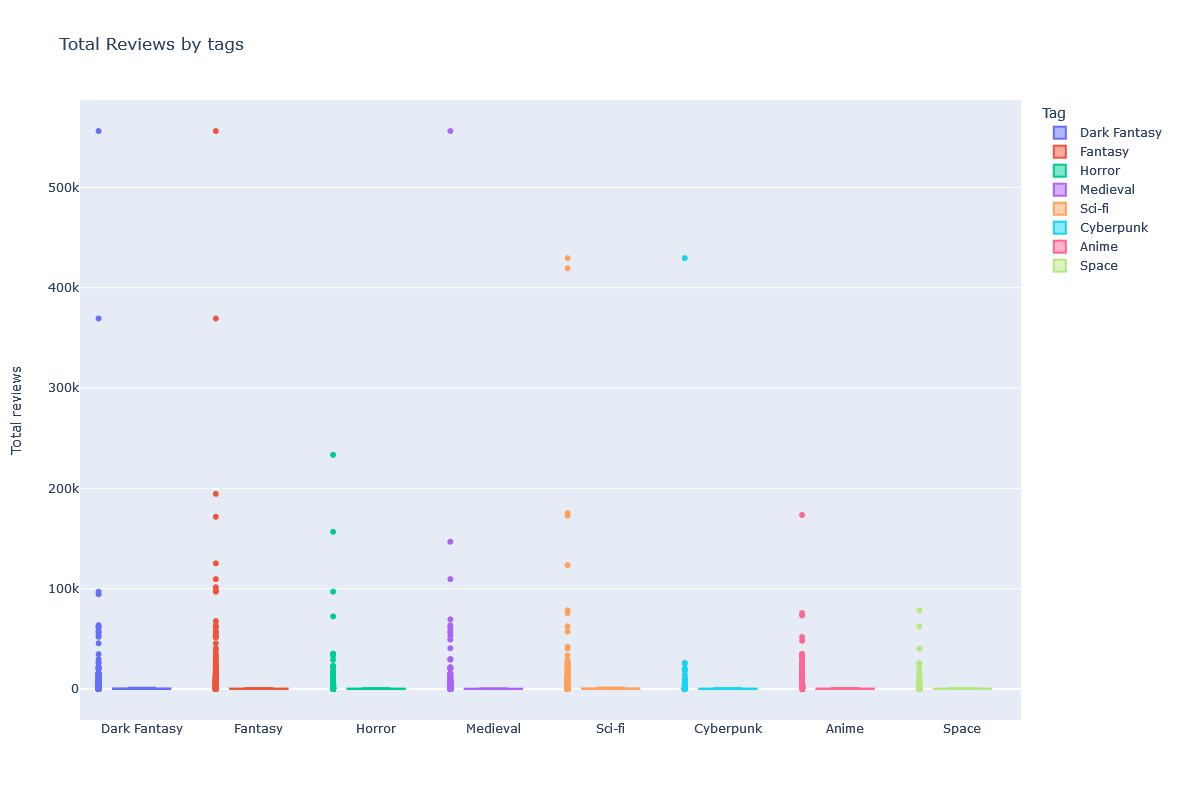

In [30]:
fig = go.Figure()

for tag in tags:
    fig.add_trace(go.Box(
        y=analysis_df[analysis_df["tags"]==tag]["total_reviews"],
        name=tag,
        text = analysis_df[analysis_df["tags"]==tag]["name"],
        hovertemplate='<br>Game: %{text}<br>Reviews: %{y}',
    ))
    
fig.update_traces(boxpoints='all',
                  jitter=0)

fig.update_layout(
    title="Total Reviews by tags",
    yaxis_title="Total reviews",
    legend_title="Tag",
    height=800
    )
    
fig.show()

#### Ratings

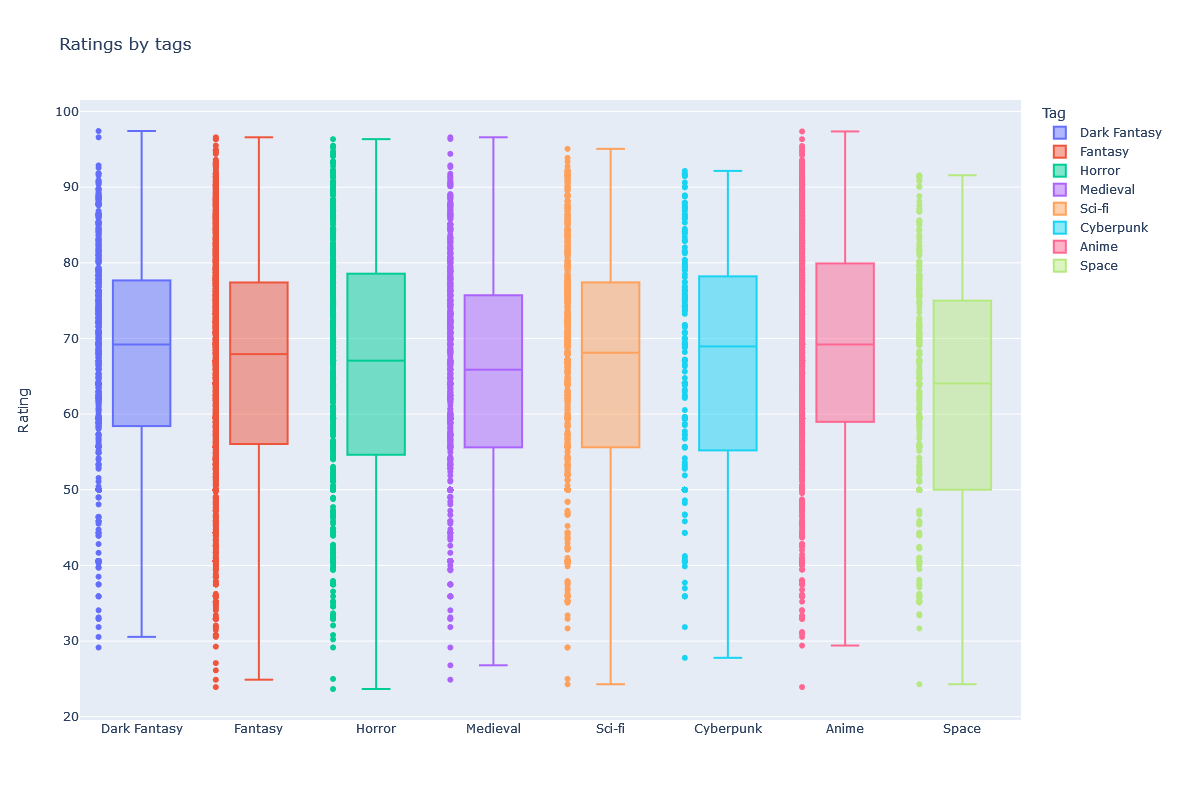

In [31]:
fig = go.Figure()

for tag in tags:
    fig.add_trace(go.Box(
        y=analysis_df[analysis_df["tags"]==tag]["rating"],
        name=tag,
        text = analysis_df[analysis_df["tags"]==tag]["name"],
        hovertemplate='<br>Game: %{text}<br>Rating: %{y}',
    ))
    
fig.update_traces(boxpoints='all',
                  jitter=0)

fig.update_layout(
    title="Ratings by tags",
    yaxis_title="Rating",
    legend_title="Tag",
    height=800
    )
    
fig.show()

### Timelines

#### Making timeline DF

In [32]:
# making timeline datatframe
timeline_df = analysis_df[analysis_df['tags'].isin(['Sci-fi','Fantasy','Medieval'])].groupby(['release_date','tags']).agg(
                                total_owners=pd.NamedAgg(column='owners', aggfunc='sum'),
                                average_owners=pd.NamedAgg(column='owners', aggfunc='mean'),
                                median_owners=pd.NamedAgg(column='owners', aggfunc='median'),
                                total_games=pd.NamedAgg(column='name', aggfunc='count'),
                                total_reviews=pd.NamedAgg(column='total_reviews', aggfunc='sum'),
                                median_ratings=pd.NamedAgg(column='rating', aggfunc='median')).reset_index()

#### Number of games

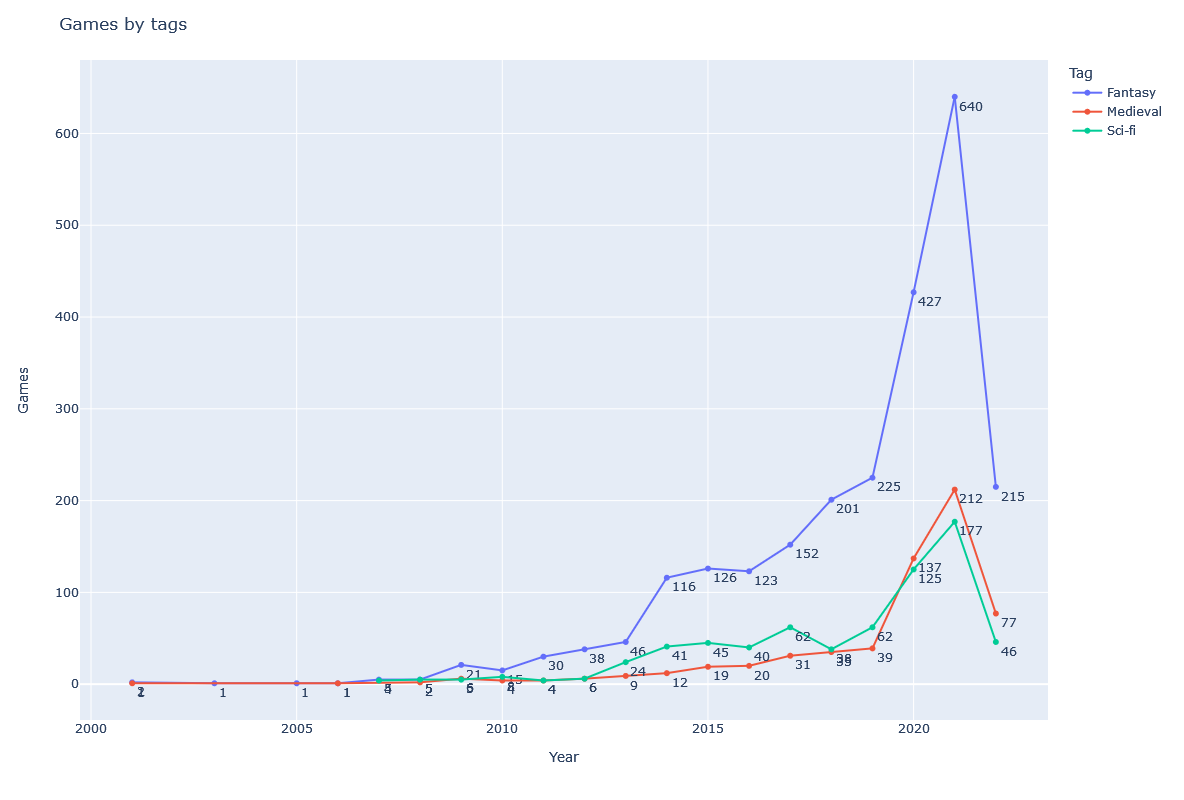

In [33]:
fig = px.line(timeline_df, x="release_date", y="total_games", color="tags", text="total_games")
fig.update_traces(textposition="bottom right")
fig.update_layout(
    title="Games by tags",
    yaxis_title="Games",
    xaxis_title="Year",
    legend_title="Tag",
    height=800
    )
fig.show()

#### Owners

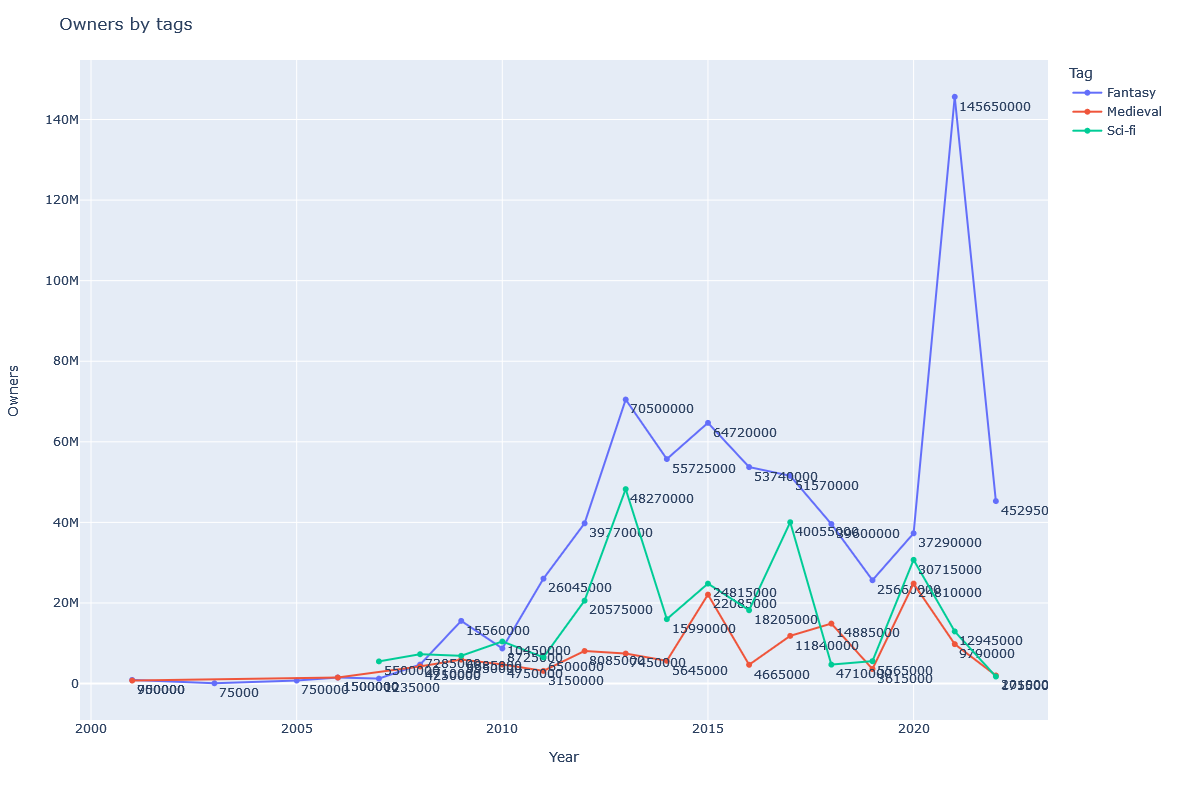

In [34]:
fig = px.line(timeline_df, x="release_date", y="total_owners", color="tags", text="total_owners")
fig.update_traces(textposition="bottom right")
fig.update_layout(
    title="Owners by tags",
    yaxis_title="Owners",
    xaxis_title="Year",
    legend_title="Tag",
    height=800
    )
fig.show()

#### Reviews

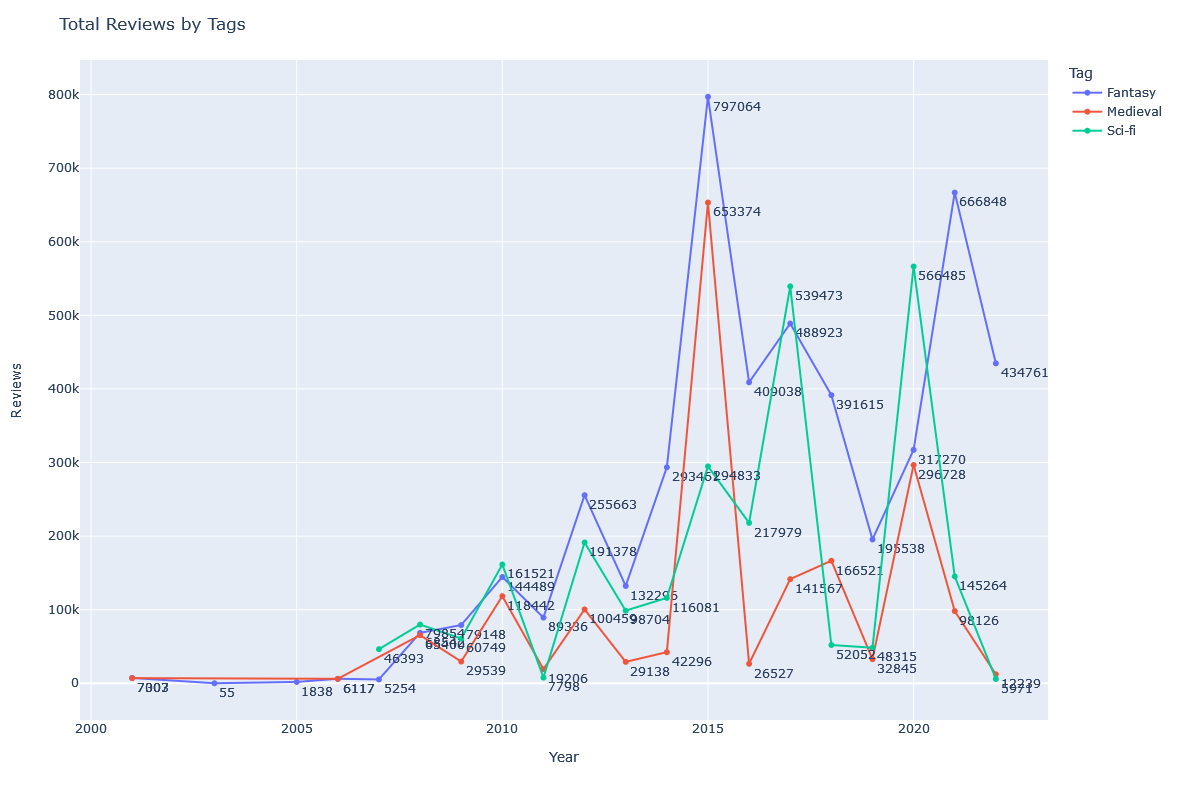

In [35]:
fig = px.line(timeline_df, x="release_date", y="total_reviews", color="tags", text="total_reviews")
fig.update_traces(textposition="bottom right")
fig.update_layout(
    title="Total Reviews by Tags",
    yaxis_title="Reviews",
    xaxis_title="Year",
    legend_title="Tag",
    height=800
    )
fig.show()

#### Ratings

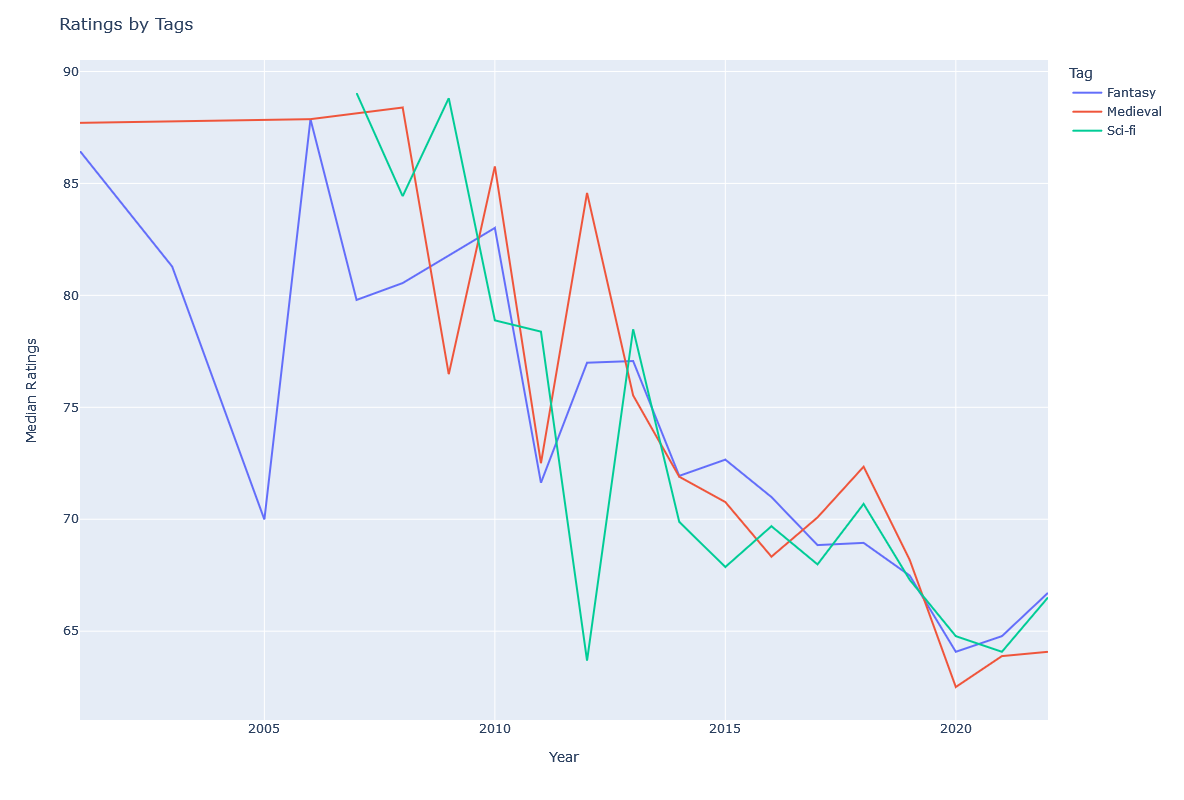

In [36]:
fig = px.line(timeline_df, x="release_date", y="median_ratings", color="tags")
fig.update_traces(textposition="bottom right")
fig.update_layout(
    title="Ratings by Tags",
    yaxis_title="Median Ratings",
    xaxis_title="Year",
    legend_title="Tag",
    height=800
    )
fig.show()

## Analyzing the results

* While the results seem interesting for the casual view, they are influenced too much by the outliers and need an adjustment for that
* A lot of data is either estimate (Owners) or not very complete (the tags we are taking info from)
* We can still make some observations based on the number of releases and the data distribution

## Random snippets

In [37]:
analysis_df[analysis_df["tags"]=="Space"].sort_values(by="total_reviews", ascending=False).head(50)

name  \
appid                                                        
211820                                           Starbound   
359320                                     Elite Dangerous   
17390                                               SPORE™   
1328670                     Mass Effect™ Legendary Edition   
261640                         Borderlands: The Pre-Sequel   
32370            STAR WARS™ - Knights of the Old Republic™   
208580   STAR WARS™ Knights of the Old Republic™ II - T...   
578650                                    The Outer Worlds   
17460                                   Mass Effect (2007)   
24980                 Mass Effect 2 Digital Deluxe Edition   
313340                                            Mountain   
1549970                             Aliens: Fireteam Elite   
402710                                    Osiris: New Dawn   
1238000             Mass Effect™: Andromeda Deluxe Edition   
8500                                            EVE Online   
290300                                        Rebel Galaxy   
728530                   SD GUNDAM G GENERATION CROSS RAYS   
979110                                         Space Haven   
238210                                      System Shock 2   
332500                                                GRAV   
214730                       Space Rangers HD: A War Apart   
236370                                Interstellar Marines   
1128920                                       EVERSPACE™ 2   
829590                                            CryoFall   
407840                        Guardians of Orion (Phase 2)   
236150                                  Starpoint Gemini 2   
230410                                            Warframe   
335620                             Star Traders: Frontiers   
419480                           Starpoint Gemini Warlords   
252470                         Space Pirates And Zombies 2   
244770                                            StarMade   
527100                             Star Trek™: Bridge Crew   
107200                           Space Pirates and Zombies   
238240                                       Edge of Space   
646270                                         60 Parsecs!   
324510                                           Boundless   
441790                                          Fragmented   
698640                                  Deep Sky Derelicts   
727130                                   Between the Stars   
863590                                      Starcom: Nexus   
1238020    Mass Effect™ 3 N7 Digital Deluxe Edition (2012)   
323060                                             Tharsis   
334420                                Out There: Ω Edition   
366910                               The Long Journey Home   
712190                    Genesis Alpha One Deluxe Edition   
609150   STAR OCEAN™ - THE LAST HOPE -™ 4K & Full HD Re...   
465490                                     Stellar Tactics   
386260                      Microcosmum: survival of cells   
371200                       Halcyon 6: Starbase Commander   
783170                                   INSOMNIA: The Ark   

                                                    genres  release_date  \
appid                                                                      
211820             [Action, Adventure, Casual, Indie, RPG]        2016.0   
359320   [Action, Adventure, Massively Multiplayer, RPG...        2015.0   
17390    [Action, Adventure, Casual, RPG, Simulation, S...        2008.0   
1328670                                      [Action, RPG]        2021.0   
261640                                       [Action, RPG]        2014.0   
32370                                     [Adventure, RPG]        2009.0   
208580                                               [RPG]        2012.0   
578650                                               [RPG]        2020.0   
17460                                        [Action, RPG]        200